# Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test =pd.read_csv('test.csv')

In [4]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
train.shape

(7920, 3)

In [6]:
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [7]:
test.shape

(1953, 2)

# EDA

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [9]:
#We can drop id columns since it doesn't have any significance to our data
train.drop(columns=['id'],inplace=True)

In [10]:
test.drop(columns=['id'],inplace=True)

In [11]:
#Lets compare how many have positive and negative reviews
train.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

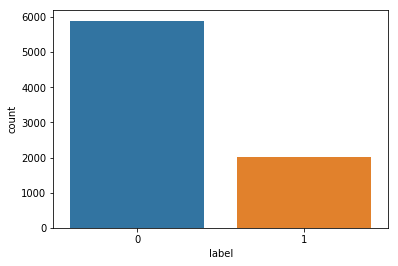

In [12]:
sns.countplot(train['label'])

In [13]:
#Does length of a text matter or not?
train['text_length'] = train['tweet'].apply(len)

In [14]:
train.head()

,label,tweet,text_length
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,0,Finally a transparant silicon case ^^ Thanks t...,131
2,0,We love this! Would you go? #talk #makememorie...,123
3,0,I'm wired I know I'm George I was made that wa...,112
4,1,What amazing service! Apple won't even talk to...,124


In [15]:
test['text_length'] = test['tweet'].apply(len)

In [16]:
test.head()

,tweet,text_length
0,I hate the new #iphone upgrade. Won't let me d...,77
1,currently shitting my fucking pants. #apple #i...,115
2,"I'd like to puts some CD-ROMS on my iPad, is t...",104
3,My ipod is officially dead. I lost all my pict...,129
4,Been fighting iTunes all night! I only want th...,70


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FDCDA6278>,
      dtype=object)

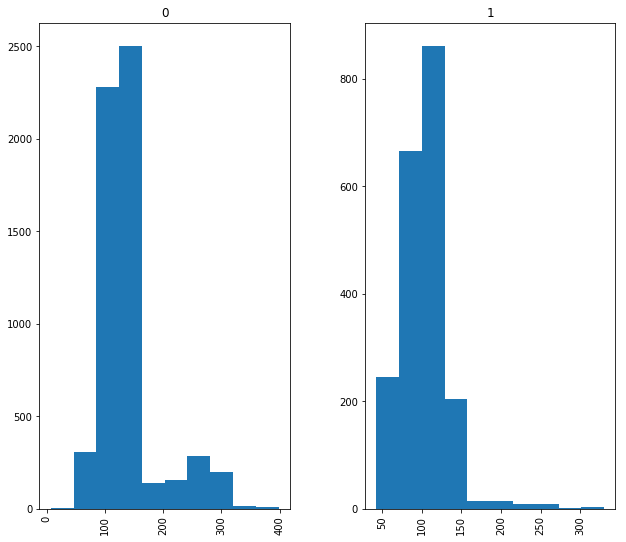

In [17]:
#Compare to see how these labels are distributed
train.hist(column='text_length',by='label',figsize=(10,9))

On average both have similar tweet length so length doesnt signify too much

In [18]:
#Combine train and test data to have common count vectorizers
tweet_df = pd.concat([train,test],axis=0)

C:\Users\Prerna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [19]:
tweet_df.shape

(9873, 3)

In [20]:
tweet_df.head()

,label,text_length,tweet
0,0.0,128,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0.0,131,Finally a transparant silicon case ^^ Thanks t...
2,0.0,123,We love this! Would you go? #talk #makememorie...
3,0.0,112,I'm wired I know I'm George I was made that wa...
4,1.0,124,What amazing service! Apple won't even talk to...


# Perform count vectorization and then Split the dataset into train and test

In [25]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer

In [26]:
sbst = SnowballStemmer('english')
word_lem = WordNetLemmatizer()

In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns all Lemmatization words
    4. Returns all Stemmed words
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    stop_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    stop_words = ' '.join(stop_words)
    
    #Lemat Words
    lemat_words = [word_lem.lemmatize(words) for words in stop_words.split() if len(words) > 0]
      
    lemat_words = ' '.join(lemat_words)
    
    #Stem words
    stem_words = [sbst.stem(words) for words in lemat_words.split() if len(words) > 0]
    
    return stem_words

In [28]:
tweet_df.tweet.head(5).apply(text_process)

0    [fingerprint, pregnanc, test, httpsgooglh1mfqv...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, would, go, talk, makememori, unplug, re...
3    [im, wire, know, im, georg, made, way, iphon, ...
4    [amaz, servic, appl, wont, even, talk, questio...
Name: tweet, dtype: object

In [57]:
#Perform count vectorization and then Split the dataset into train and test
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
X = tweet_df['tweet']
y = tweet_df['label']
cv = CountVectorizer(analyzer=text_process)
#tfidf_transformer = TfidfTransformer()

In [58]:
#Do count vectorization
X = cv.fit_transform(X)
#X = tfidf_transformer.fit_transform(X)


In [59]:
#Split the data into train and test again
act_test = X[7920:]
X = X[:7920]
y = y[:7920]


In [60]:
act_test.shape

(1953, 24682)

In [61]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the model

In [62]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [63]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predictions and Evaluation

In [64]:
pred = nb.predict(X_test)

Create confusion matrix and classification report

In [56]:
#Using both CountVectorizer and TfidfTransformer
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.80      0.98      0.88      1439
        1.0       0.88      0.36      0.52       541

avg / total       0.82      0.81      0.78      1980



[[1412   27]
 [ 344  197]]


The Classification report shows that the TfidfTransformer has made our score worse. We can try with a different 
classification method or create a custom analyzer to improve our model.

In [65]:
#Using only CountVectorization
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.95      0.89      0.92      1439
        1.0       0.74      0.87      0.80       541

avg / total       0.89      0.88      0.88      1980



[[1274  165]
 [  70  471]]


The Classification report shows that using only Count Vectorizer has improved our score.
We can try with a different classification method or create a custom analyzer to improve our model.

# Predicting on actual test data

Predict the test set

In [66]:
test_pred = nb.predict(act_test)

In [67]:
pred_df = pd.DataFrame(test_pred,columns=['label'])

# Read the Submission csv file

In [68]:
submission = pd.read_csv('sample_submission.csv')

In [69]:
final_pred = pd.concat([submission.id,pred_df],axis=1)

# Export the csv file

In [70]:
final_pred.to_csv('Final_Submit.csv',index=False)